In [ ]:
# Lab 4.1 Clean Numerical Data

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score


In [3]:
%matplotlib inline

In [4]:
pd.set_option('display.max_columns',None)

# Load the data and general info

In [6]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [8]:
customer_df.head(8)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,Rural,Married,69,14,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,Suburban,Married,67,0,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,Arizona,7216.100311,No,Premium,Master,1/18/11,Unemployed,M,0,Urban,Single,101,0,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize


In [9]:
customer_df.shape

(9134, 24)

In [10]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [11]:
customer_df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


# Rename Columns

In [14]:
customer_df.columns = list(map(lambda x: x.lower().replace(' ','_'),list(customer_df.columns)))

In [15]:
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [16]:
list(customer_df.columns)

['customer',
 'state',
 'customer_lifetime_value',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'income',
 'location_code',
 'marital_status',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'total_claim_amount',
 'vehicle_class',
 'vehicle_size']

In [19]:
customer_df.rename(columns={'customer_lifetime_value':'clv',
                            'effective_to_date': 'e2d',
                            'employmentstatus':'e_status',
                            'location_code': 'loc_code',
                            'marital_status': 'm_status',
                            'monthly_premium_auto':'mpa',
                            'months_since_last_claim': 'mslc',
                            'months_since_policy_inception': 'mspi',
                            'number_of_open_complaints': 'noc',
                            'number_of_policies': 'n_policies',
                            'renew_offer_type': 'rot',
                            'sales_channel':'channel',
                            'total_claim_amount': 'tca'},
                  inplace=True)

In [20]:
customer_df

,customer,state,clv,response,coverage,education,e2d,e_status,gender,income,loc_code,m_status,mpa,mslc,mspi,noc,n_policies,policy_type,policy,rot,channel,tca,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


# Change e2d to datetime format

In [26]:
customer_df.e2d = pd.to_datetime(customer_df.e2d)

In [27]:
customer_df.dtypes

customer                 object
state                    object
clv                     float64
response                 object
coverage                 object
education                object
e2d              datetime64[ns]
e_status                 object
gender                   object
income                    int64
loc_code                 object
m_status                 object
mpa                       int64
mslc                      int64
mspi                      int64
noc                       int64
n_policies                int64
policy_type              object
policy                   object
rot                      object
channel                  object
tca                     float64
vehicle_class            object
vehicle_size             object
dtype: object

# continuous discrete function

Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

In [32]:
# save and drop customer_id
customer_id = customer_df.customer
customer_id

0       BU79786
1       QZ44356
2       AI49188
3       WW63253
4       HB64268
         ...   
9129    LA72316
9130    PK87824
9131    TD14365
9132    UP19263
9133    Y167826
Name: customer, Length: 9134, dtype: object

In [33]:
customer_df.drop(columns='customer',inplace=True)

In [36]:
for c in customer_df.columns:
    print(customer_df[c].nunique(), c)

5 state
8041 clv
2 response
3 coverage
5 education
59 e2d
5 e_status
2 gender
5694 income
3 loc_code
3 m_status
202 mpa
36 mslc
100 mspi
6 noc
9 n_policies
3 policy_type
9 policy
4 rot
4 channel
5106 tca
6 vehicle_class
3 vehicle_size


In [37]:
def continuous_discrete(df,n=10):
    cont = []
    disc = []
    for c in df.columns:
        if df[c].nunique() >= n:
            cont.append(c)
        else:
            disc.append(c)
    
    continuous_df = df[cont]
    discret_df = df[disc]
    
    return continuous_df, discret_df
    

In [49]:
continuous_df, discrete_df = continuous_discrete(customer_df)

In [39]:
continuous_df.head(10)

,clv,e2d,income,mpa,mslc,mspi,tca
0,2763.519279,2011-02-24,56274,69,32,5,384.811147
1,6979.535903,2011-01-31,0,94,13,42,1131.464935
2,12887.431650,2011-02-19,48767,108,18,38,566.472247
3,7645.861827,2011-01-20,0,106,18,65,529.881344
4,2813.692575,2011-02-03,43836,73,12,44,138.130879
5,8256.297800,2011-01-25,62902,69,14,94,159.383042
6,5380.898636,2011-02-24,55350,67,0,13,321.600000
7,7216.100311,2011-01-18,0,101,0,68,363.029680
8,24127.504020,2011-01-26,14072,71,13,3,511.200000
9,7388.178085,2011-02-17,28812,93,17,7,425.527834


In [50]:
discrete_df.head(10)

,state,response,coverage,education,e_status,gender,loc_code,m_status,noc,n_policies,policy_type,policy,rot,channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
5,Oregon,Yes,Basic,Bachelor,Employed,F,Rural,Married,0,2,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,Medsize
6,Oregon,Yes,Basic,College,Employed,F,Suburban,Married,0,9,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize
7,Arizona,No,Premium,Master,Unemployed,M,Urban,Single,0,4,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize
8,Oregon,Yes,Basic,Bachelor,Medical Leave,M,Suburban,Divorced,0,2,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize
9,Oregon,No,Extended,College,Employed,F,Urban,Married,0,8,Special Auto,Special L2,Offer2,Branch,Four-Door Car,Medsize


In [ ]:
# Effective to date is a datetime variable

In [ ]:
effective_date = continuous_df.e2d

In [ ]:
continuous_df.drop(columns='e2d',inplace=True)

# Plot a correlation matrix and comment

In [41]:
continuous_df.corr()

,clv,income,mpa,mslc,mspi,tca
clv,1.000000,0.024366,0.396262,0.011517,0.009418,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,-0.355254
mpa,0.396262,-0.016665,1.000000,0.005026,0.020257,0.632017
mslc,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.007563
mspi,0.009418,-0.000875,0.020257,-0.042959,1.000000,0.003335
tca,0.226451,-0.355254,0.632017,0.007563,0.003335,1.000000


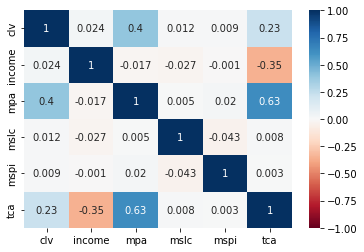

In [46]:
sns.heatmap(round(continuous_df.corr(),3), vmin = -1, vmax = 1, cmap = 'RdBu', annot=True)
plt.show()

Monthly Premium Auto (mpa) is the highest correlated variable.  
After comes income with inverse correlation.  
Also Customer Lifetime Value has a low correlation and multicollinearity with mpa

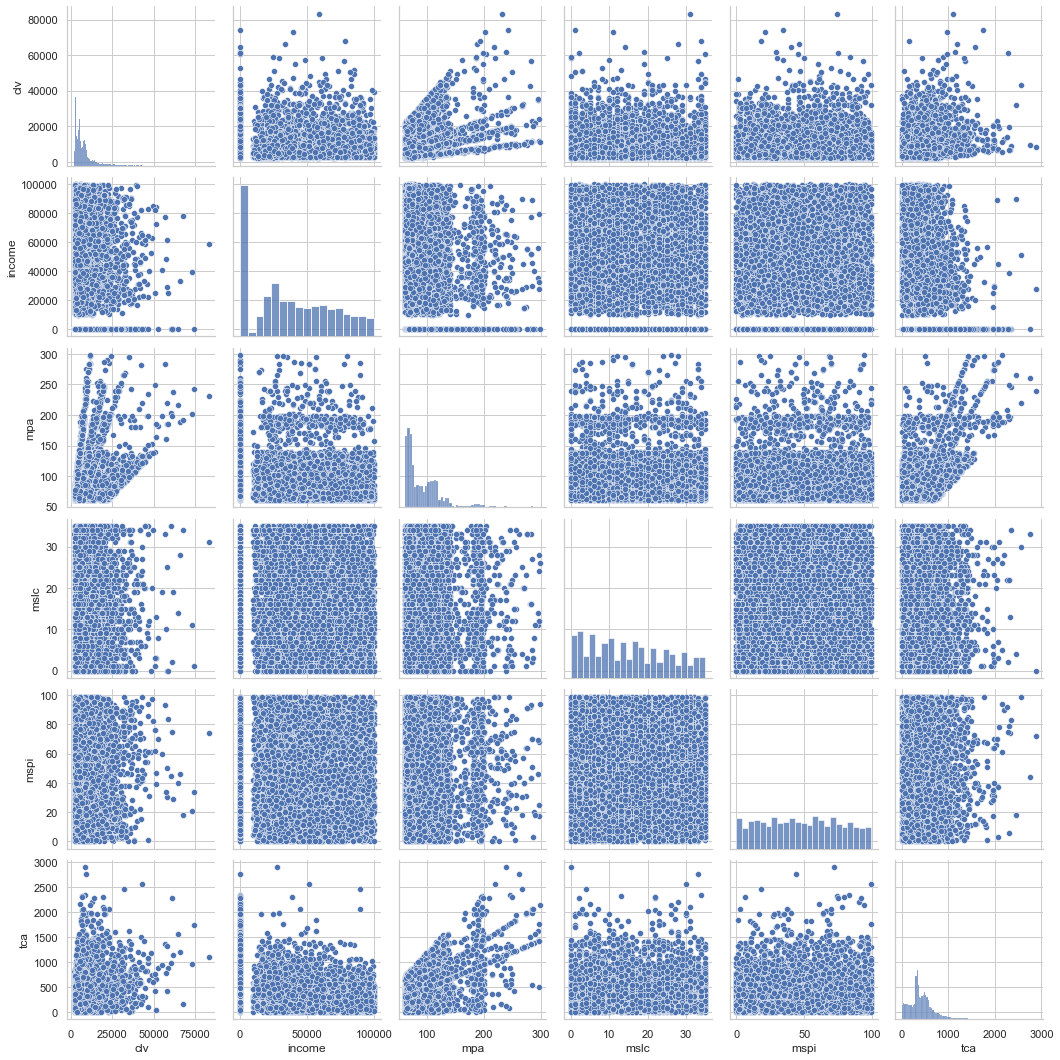

In [88]:
sns.pairplot(continuous_df)
plt.show()

## Define a function

In [94]:
def corrPlots(df):
    display(df.corr())
    sns.heatmap(round(df.corr(),3), vmin = -1, vmax = 1, cmap = 'RdBu', annot=True)
    plt.show()
    sns.pairplot(df)
    plt.show()

# Functions to plot discrete and continuous

## plot discrete

In [68]:
def plotDiscrete(df):
    for c in df.columns:
        ax = sns.countplot(x=c,data=df)
        plt.title(c)
        plt.xlabel(None)
        plt.tick_params(axis='x', labelrotation=55)
        # annotate
        ax.bar_label(ax.containers[0], label_type='edge')

        # pad the spacing between the number and the edge of the figure
        ax.margins(y=0.1)
        
        plt.show()
        

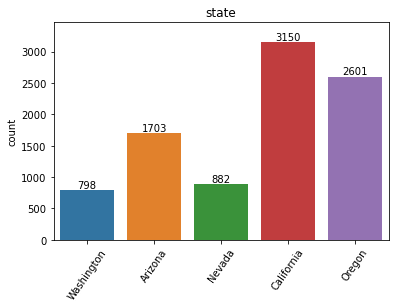

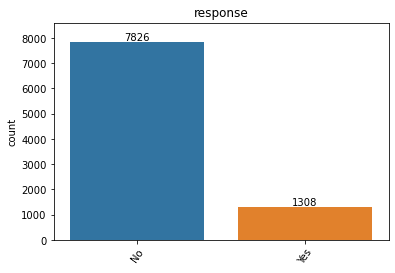

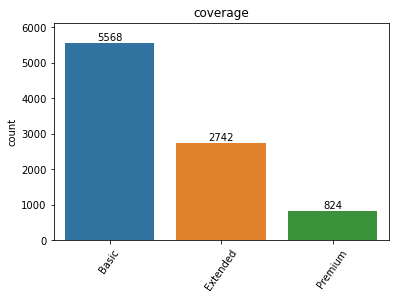

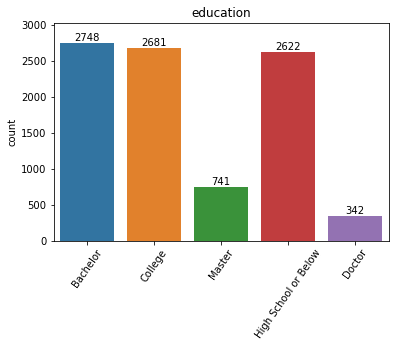

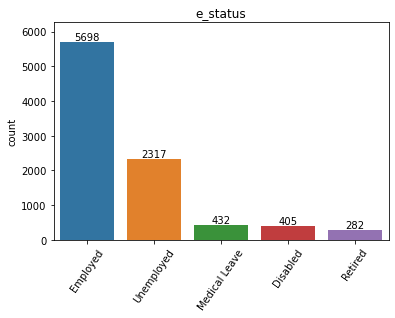

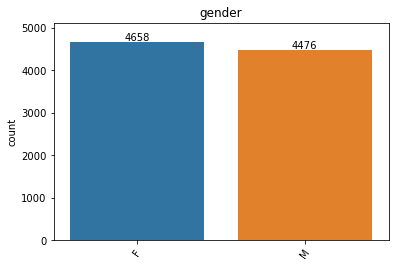

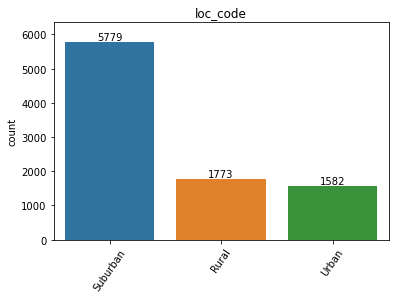

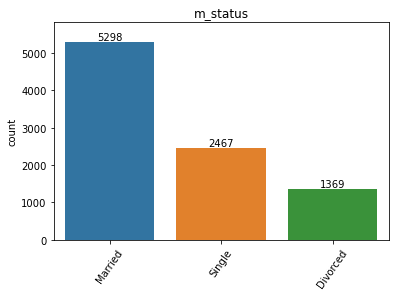

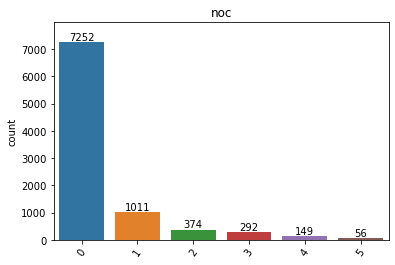

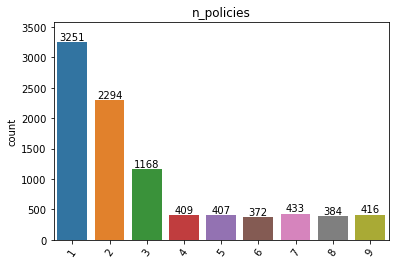

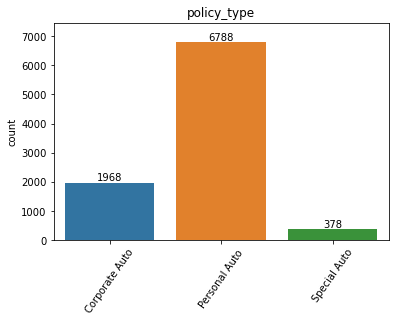

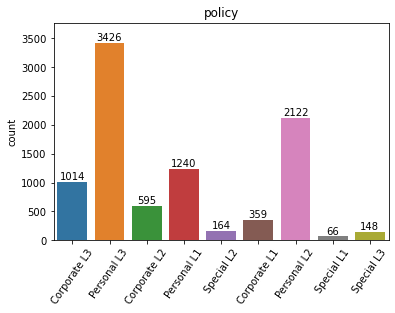

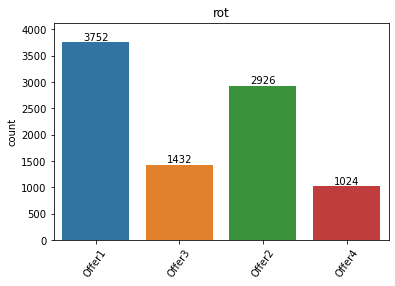

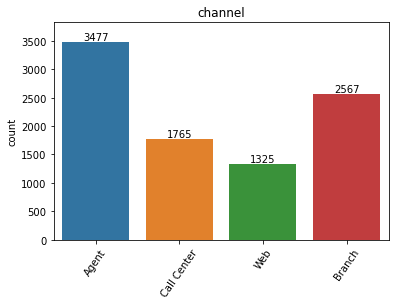

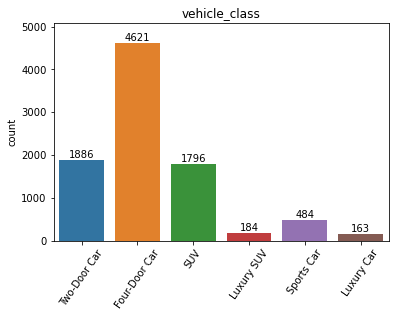

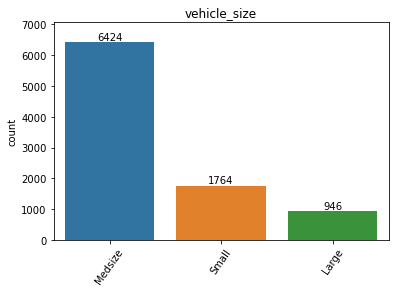

In [69]:
plotDiscrete(discrete_df)

Number of policies and number of complaints are numerical. They might work as ordinal categories as well.

## Plot continuous

In [70]:
def plotContinuous(df):
    for c in df.columns:
        sns.histplot(x=c,data=df, kde=True)
        plt.title(c)
        plt.xlabel(None)
        plt.tick_params(axis='x', labelrotation=55)
        plt.show()

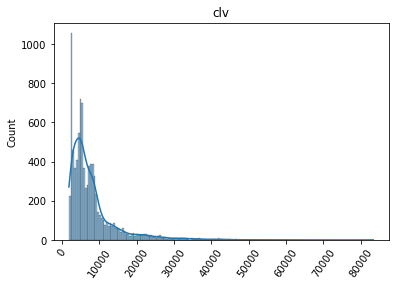

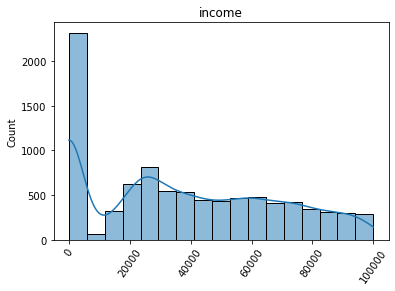

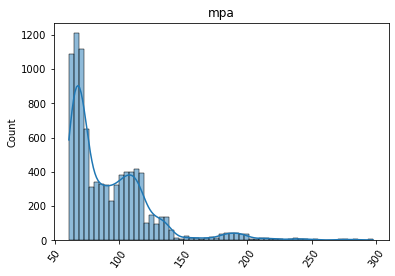

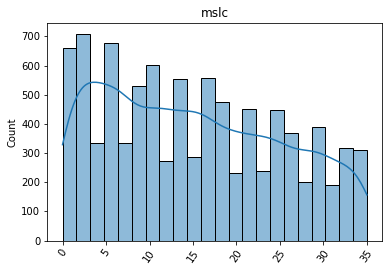

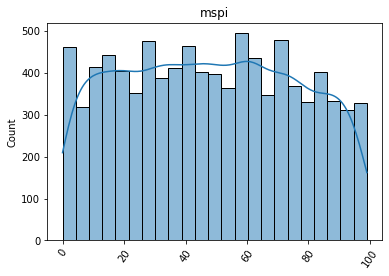

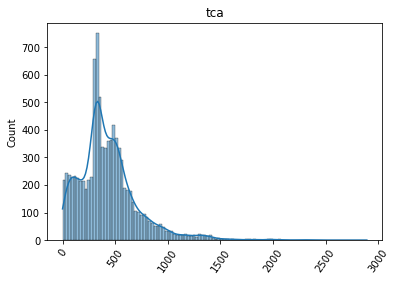

In [74]:
plotContinuous(continuous_df)

Effective to date is datetime.  


In [72]:
#effective_date = continuous_df.e2d

In [73]:
#continuous_df.drop(columns='e2d',inplace=True)

/Users/albertomengual/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Comment the plots

I just see single count plots of every categorical variable. I have not got any notion of the relevance of those categorical variables.  
Most of them undergo class imbalance. Except gender.   
  
In the continuous variables I dropped effective to date because is datetime.  
mspi, mslc and income show a relatively uniform distribution.  
tca, mpa and clv are highly skewed.
  
There's a strangely high amount of 0 in income.  
  
Let's get the the skewness

In [75]:
continuous_df.skew()

clv       3.032280
income    0.286887
mpa       2.123546
mslc      0.278586
mspi      0.040165
tca       1.714966
dtype: float64

# Outliers in continuous

In [76]:
def continuousOutliers(df):
    for c in df.columns:
        sns.set_theme(style="whitegrid")
        ax = sns.boxplot(x=c, data=df, orient='h')
        plt.title(c)
        plt.xlabel(None)
        #plt.tick_params(axis='x', labelrotation=55)
        plt.show()
        

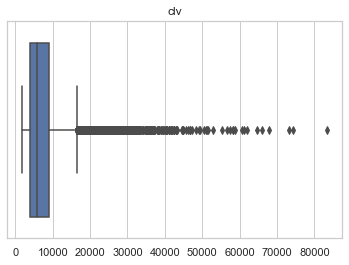

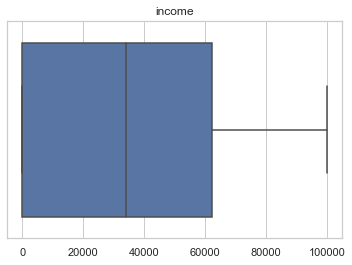

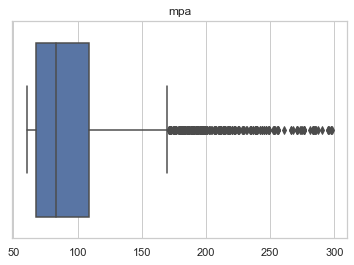

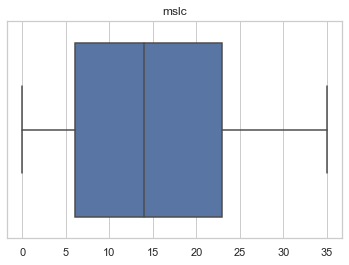

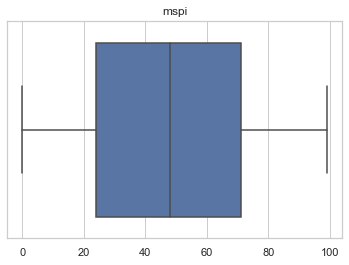

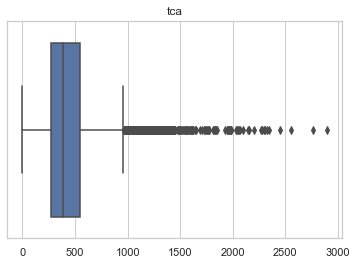

In [77]:
continuousOutliers(continuous_df)

# Comment outliers

There are outliers in the continuous variables that have high skewness:   
* Customer Lifetime Value
* Monthly Premium Auto
* Total Claim Amount

As far as I understood there are two possible options:
1. Remove the outliers
1. Create a new category and model just for the outliers

In [79]:
# Lets count the number of outliers that could be dropped

## count clv outliers

In [80]:

iqr_clv = np.nanpercentile(continuous_df.clv ,75) - np.nanpercentile(continuous_df.clv,25)

upper_limit = np.nanpercentile(continuous_df.clv,75) + 1.5*iqr_clv
print(upper_limit)

outliers_clv = continuous_df[continuous_df.clv > upper_limit]
len(outliers_clv)  # This checks the number of points that will be removed


16414.039911750002


817

In [81]:
outliers_clv

,clv,income,mpa,mslc,mspi,tca
8,24127.50402,14072,71,13,3,511.200000
22,24127.50402,14072,71,13,3,511.200000
31,18975.45611,65999,237,1,14,615.927769
50,36707.42639,24804,104,1,28,593.830288
51,33473.34946,33190,106,18,95,508.800000
...,...,...,...,...,...,...
9097,30104.51969,0,94,15,7,848.737364
9110,34611.37896,20090,109,10,59,523.200000
9122,25464.82059,13663,97,1,66,465.600000
9125,19872.26200,0,185,26,35,1950.725547


In [ ]:
# Check the remaining outliers in other variables if the outliers were removed

In [83]:
typical_clv = continuous_df[continuous_df.clv <= upper_limit]

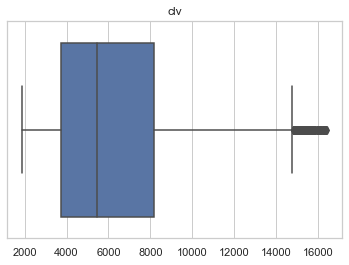

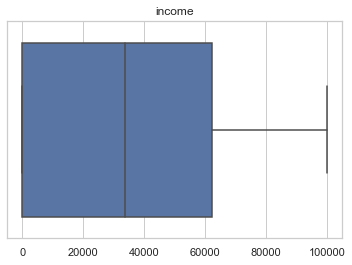

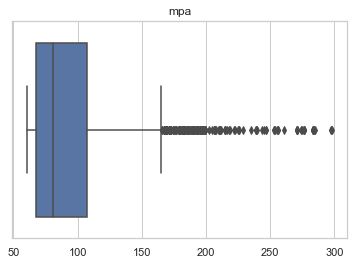

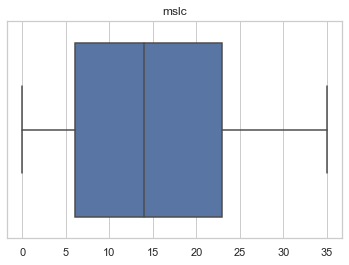

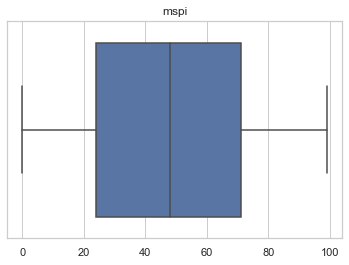

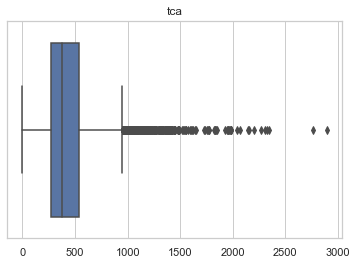

In [84]:
continuousOutliers(typical_clv)

In [ ]:
# ??? How could be checked the proportion of outliers shared

## count mpa outliers

In [86]:

iqr_mpa = np.nanpercentile(continuous_df.mpa ,75) - np.nanpercentile(continuous_df.mpa,25)

upper_limit = np.nanpercentile(continuous_df.mpa,75) + 1.5*iqr_mpa
print(upper_limit)

outliers_mpa = continuous_df[continuous_df.mpa > upper_limit]
len(outliers_mpa)  # This checks the number of points that will be removed


170.5


430

## count tca outliers

In [87]:

iqr_tca = np.nanpercentile(continuous_df.tca ,75) - np.nanpercentile(continuous_df.tca,25)

upper_limit = np.nanpercentile(continuous_df.tca,75) + 1.5*iqr_tca
print(upper_limit)

outliers_tca = continuous_df[continuous_df.tca > upper_limit]
len(outliers_tca)  # This checks the number of points that will be removed


960.3997301249999


453

I would finally create groups for total claim amount (with qcut) and study them separately.  
Besides I would study the meaning of the outliers in Customer Lifetime Value and decide whether to drop them or not.

# Check all the columns for NaN values

In [78]:
customer_df.isna().sum()

state            0
clv              0
response         0
coverage         0
education        0
e2d              0
e_status         0
gender           0
income           0
loc_code         0
m_status         0
mpa              0
mslc             0
mspi             0
noc              0
n_policies       0
policy_type      0
policy           0
rot              0
channel          0
tca              0
vehicle_class    0
vehicle_size     0
dtype: int64

There are any NaN values. I am going to study the 0 in income

In [90]:
customer_df.e_status[customer_df.income == 0].value_counts()

Unemployed    2317
Name: e_status, dtype: int64

In [92]:
customer_df.income[customer_df.e_status == 'Unemployed'].value_counts()

0    2317
Name: income, dtype: int64

This may be a group to be considered appart. Maybe I could get a different approach 

In [93]:
unemployed_df = continuous_df[continuous_df.income == 0]
employed_df = continuous_df[continuous_df.income != 0]

## Plot employed

,clv,income,mpa,mslc,mspi,tca
clv,1.000000,0.002915,0.399491,0.018531,0.011275,0.245464
income,0.002915,1.000000,-0.012372,-0.034453,0.015799,-0.221879
mpa,0.399491,-0.012372,1.000000,0.005887,0.020112,0.636084
mslc,0.018531,-0.034453,0.005887,1.000000,-0.039993,0.001460
mspi,0.011275,0.015799,0.020112,-0.039993,1.000000,-0.003733
tca,0.245464,-0.221879,0.636084,0.001460,-0.003733,1.000000


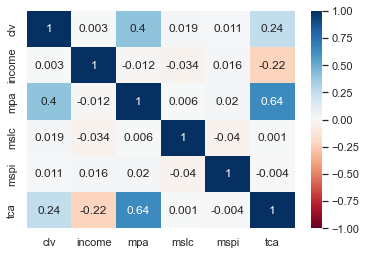

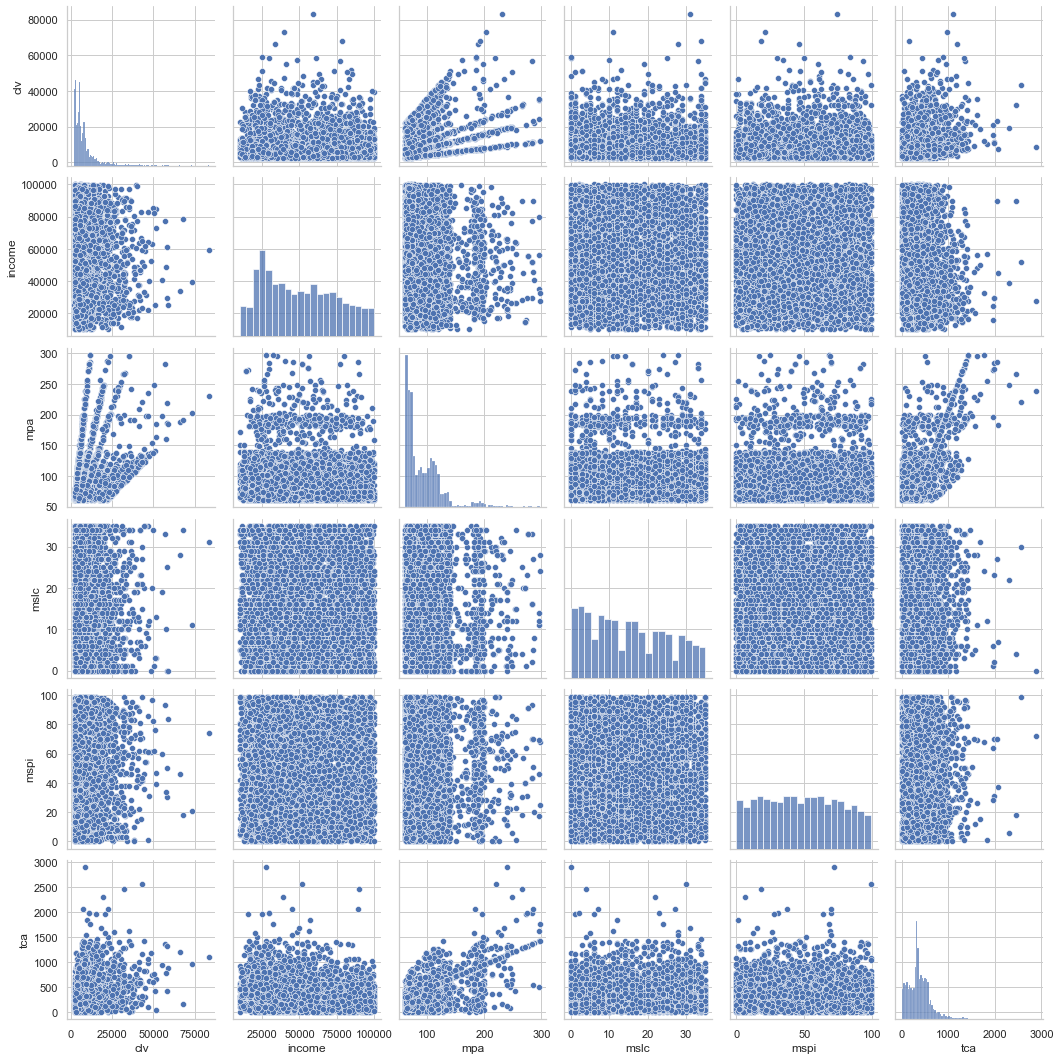

In [95]:
corrPlots(employed_df)

## Plot Unemployed

,clv,income,mpa,mslc,mspi,tca
clv,1.000000,NaN,0.388739,-0.008944,0.005547,0.273482
income,NaN,NaN,NaN,NaN,NaN,NaN
mpa,0.388739,NaN,1.000000,0.002007,0.019980,0.753336
mslc,-0.008944,NaN,0.002007,1.000000,-0.052150,0.013146
mspi,0.005547,NaN,0.019980,-0.052150,1.000000,0.003553
tca,0.273482,NaN,0.753336,0.013146,0.003553,1.000000


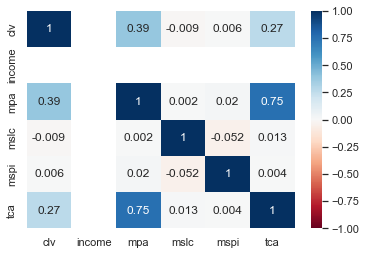

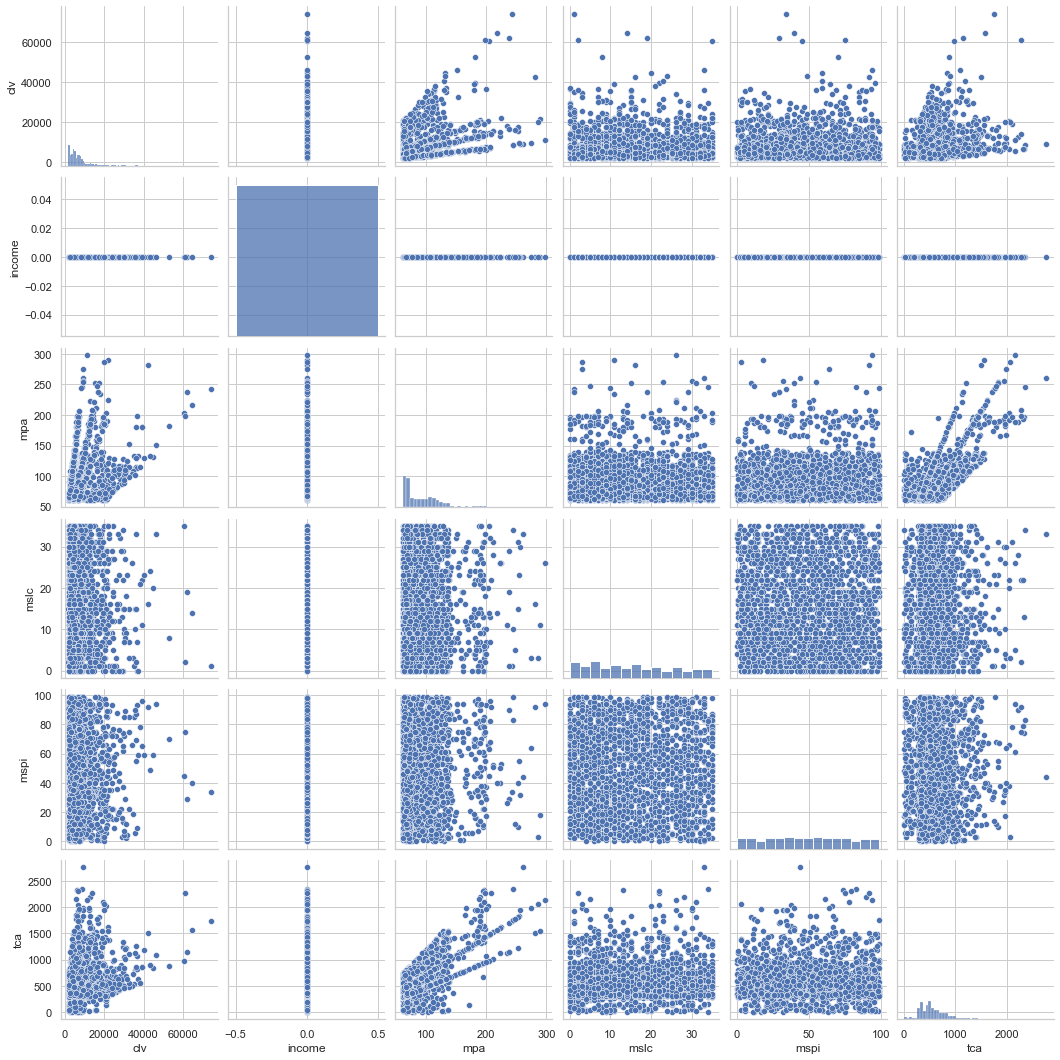

In [96]:
corrPlots(unemployed_df)